In [99]:
import pandas as pd
import numpy as np
import operator
#data_103=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/103年來臺旅客消費及動向調查.csv')
#data_104=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/104年來臺旅客消費及動向調查(原始資料).csv')
#data_105=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/105年來臺旅客消費及動向調查(原始資料).csv')
#data_106=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/106年來臺旅客消費及動向調查_原始資料_1內容.csv')
#print(data_103.info())
#print(data_104.info())
#print(data_105.info())
#print(data_106.info())
data_all=pd.read_csv('/Users/Mac/taiwan-tourism/data/all.csv')
#print(data_all.info())

In [113]:
#data_103=data_103[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#data_104=data_104[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#data_105=data_105[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#data_106=data_106[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#merge_data=pd.concat([data_103,data_104,data_105,data_106],axis=0) #合併dataframe
t_data=data_all[['id','type','stay','money','pmoney','nation','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
t_data['t_money']=t_data['money']+t_data['pmoney']
t_data['avg_money']=t_data['t_money']/t_data['stay']
t_data['type'][t_data['type'].isin([2,3])]=2
t_data['type'][t_data['type'].isin([4,5])]=3
#t_data=pd.merge(all_data,merge_data,how='inner', on='id')
print(t_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17076 entries, 0 to 17075
Data columns (total 24 columns):
id           17076 non-null int64
type         17076 non-null int64
stay         17076 non-null int64
money        17076 non-null float64
pmoney       17076 non-null float64
nation       17076 non-null int64
purp1        17076 non-null int64
sp01         17047 non-null float64
sp02         16944 non-null float64
sp03         16542 non-null float64
sp04         15783 non-null float64
sp05         14501 non-null float64
sp06         12971 non-null float64
sp07         11289 non-null float64
sp08         9733 non-null float64
sp09         8425 non-null float64
sp10         7336 non-null float64
sp11         6432 non-null float64
sp12         5612 non-null float64
sp13         4776 non-null float64
sp14         3863 non-null float64
sp15         2760 non-null float64
t_money      17076 non-null float64
avg_money    17076 non-null float64
dtypes: float64(19), int64(5)
memory usage: 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anacon

In [114]:
t_data=t_data.convert_objects(convert_numeric=True)
t_data=t_data[t_data['purp1']==1]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


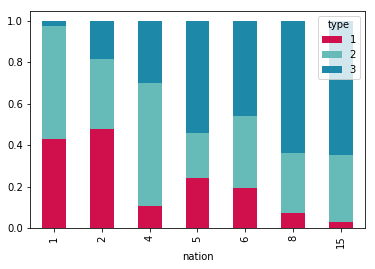

In [143]:
group_data=t_data.groupby(['nation','type']).size().unstack()
group_data['sum']=group_data[1]+group_data[2]+group_data[3]
group_data[1]=group_data[1]/group_data['sum']
group_data[2]=group_data[2]/group_data['sum']
group_data[3]=group_data[3]/group_data['sum']
group_data=group_data[[1,2,3]]        
group_data.plot(kind='bar', stacked=True ,colors =['#D0104C',  '#66BAB7', '#1E88A8'])
#.unstack('type')


In [145]:
jp_data=t_data[t_data['nation']==1]
ch_data=t_data[t_data['nation']==2]
ko_data=t_data[t_data['nation']==5]
si_data=t_data[t_data['nation']==4]
as_data=t_data[t_data['nation']==6]
eu_data=t_data[t_data['nation']==8]

In [144]:
data_type01=t_data[t_data['type']==1]
data_type02=t_data[t_data['type']==2]
data_type03=t_data[t_data['type']==3]

In [46]:
def spot_dict(country_data):
    spot={}
    country_data=country_data[['sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
    for i in country_data.columns:
        for j in range(len(list(country_data[i]))):
            if list(country_data[i])[j]>0:
                if list(country_data[i])[j] not in spot:
                    spot[list(country_data[i])[j]]=1
                else:
                    spot[list(country_data[i])[j]]+=1
    #spot=sorted(spot.items(), key=operator.itemgetter(1), reverse=True)
    return spot

def to_frame(i_spot):
    i_list1=list(i_spot.keys())
    i_list2=list(i_spot.values())
    i_dict={'id':i_list1, 'number':i_list2}
    i_spot=pd.DataFrame.from_dict(i_dict)
    i_spot=i_spot.sort_values(by=['number'],ascending=False)
    i_spot=i_spot.iloc[0:20,]
    ss=0
    for v in list(i_spot['number']):
        ss+=v**2
    mrs=np.sqrt(ss)
    i_spot['num_std']=i_spot['number']/mrs
    return i_spot

In [146]:
jp_spot=spot_dict(jp_data)
jp_spot=to_frame(jp_spot)
as_spot=spot_dict(as_data)
as_spot=to_frame(as_spot)
ch_spot=spot_dict(ch_data)
ch_spot=to_frame(ch_spot)
ko_spot=spot_dict(ko_data)
ko_spot=to_frame(ko_spot)
si_spot=spot_dict(si_data)
si_spot=to_frame(si_spot)
eu_spot=spot_dict(eu_data)
eu_spot=to_frame(eu_spot)



In [147]:
#分成團客與自由行資料
type01_spot=spot_dict(data_type01)
type01_spot=to_frame(type01_spot)
type02_spot=spot_dict(data_type02)
type02_spot=to_frame(type02_spot)
type03_spot=spot_dict(data_type03)
type03_spot=to_frame(type03_spot)

In [150]:
#整理出所有國家遊客的top10景點
spot_list=list(jp_spot['id'])+list(ch_spot['id'])+list(ko_spot['id']+list(as_spot['id'])+list(si_spot['id'])+list(eu_spot['id']))
spot_list=list(set(spot_list))
spot_list2=list(type01_spot['id'])+list(type02_spot['id'])+list(type03_spot['id'])
spot_list2=list(set(spot_list2))
spot_name=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/spot_name.csv')
spot_name=spot_name.convert_objects(convert_numeric=True)
all_spot=spot_name[spot_name['id'].isin(spot_list)]  #用isin()來挑出id有在spot_list裡的rows
all_spot2=spot_name[spot_name['id'].isin(spot_list2)]  #用isin()來挑出id有在spot_list裡的rows
all_spot.to_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/all_spot.csv')
all_spot2.to_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/all_spot2.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


In [151]:
#畫地圖&畫圖函式
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map(all_spot2,country):
    plt.figure(figsize=(32,16)) #開一張圖
    plt.title(country)
    m = Basemap(llcrnrlon = 119.3, llcrnrlat = 21, urcrnrlon = 123, urcrnrlat = 26,resolution = 'h', epsg = 3415) #使用basemap 定位在台灣附近的經緯度
    m.drawcoastlines() #畫出線條
    m.readshapefile('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/mapdata201805310314/COUNTY_MOI_1070516','COUNTY_MOI_1070516') #導入行政區劃圖 （檔名要重複兩次）
    #以下是畫上景點
    for s in range(len(list(all_spot2['id']))):   
        lon=list(all_spot2['lon'])[s]
        lat=list(all_spot2['lat'])[s]
        num=list(all_spot2['num_std'])[s]
        x, y = m(lon, lat)
        m.scatter(x, y, marker = 'o', color = 'm',s=num*600) #marker=>形狀  color=>顏色  s=>大小 
    save='/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/'+country
    plt.savefig(save , dpi=100) #將圖存起來  一定要放在show前面
    plt.show()
    
def draw_map_newTaipei(all_spot2,country):
    plt.figure(figsize=(24,12)) #開一張圖
    plt.title(country)
    m = Basemap(llcrnrlon = 121.149265, llcrnrlat = 24.9, urcrnrlon = 122.076999, urcrnrlat = 25.376272,resolution = 'h', epsg = 3415) #使用basemap 定位在新北附近的經緯度
    m.drawcoastlines() #畫出線條
    m.readshapefile('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/mapdata201805310314/COUNTY_MOI_1070516','COUNTY_MOI_1070516') #導入行政區劃圖 （檔名要重複兩次）
    #以下是畫上景點
    for s in range(len(list(all_spot2['id']))):   
        lon=list(all_spot2['lon'])[s]
        lat=list(all_spot2['lat'])[s]
        num=list(all_spot2['num_std'])[s]
        x, y = m(lon, lat)
        m.scatter(x, y, marker = 'o', color = 'm',s=num*2000) #marker=>形狀  color=>顏色  s=>大小 
    save='/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/'+country+'_Taipei'
    plt.savefig(save , dpi=100) #將圖存起來  一定要放在show前面
    plt.show()


    

In [96]:
all_spot2=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/all_spot_2.csv')
all_spot2=all_spot2.convert_objects(convert_numeric=True)
all_spot2=all_spot2[['id','name','lon','lat']]

#以下為join各國top 10的frame以及景點位置的frame
jp_spot2=pd.merge(jp_spot,all_spot2 ,how='inner', on='id')
ch_spot2=pd.merge(ch_spot,all_spot2 ,how='inner', on='id')
ko_spot2=pd.merge(ko_spot,all_spot2 ,how='inner', on='id')
as_spot2=pd.merge(as_spot,all_spot2 ,how='inner', on='id')
si_spot2=pd.merge(si_spot,all_spot2 ,how='inner', on='id')
eu_spot2=pd.merge(eu_spot,all_spot2 ,how='inner', on='id')
type01_spot2=pd.merge(type01_spot,all_spot2 ,how='inner', on='id')
type02_spot2=pd.merge(type02_spot,all_spot2 ,how='inner', on='id')
type03_spot2=pd.merge(type03_spot,all_spot2 ,how='inner', on='id')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


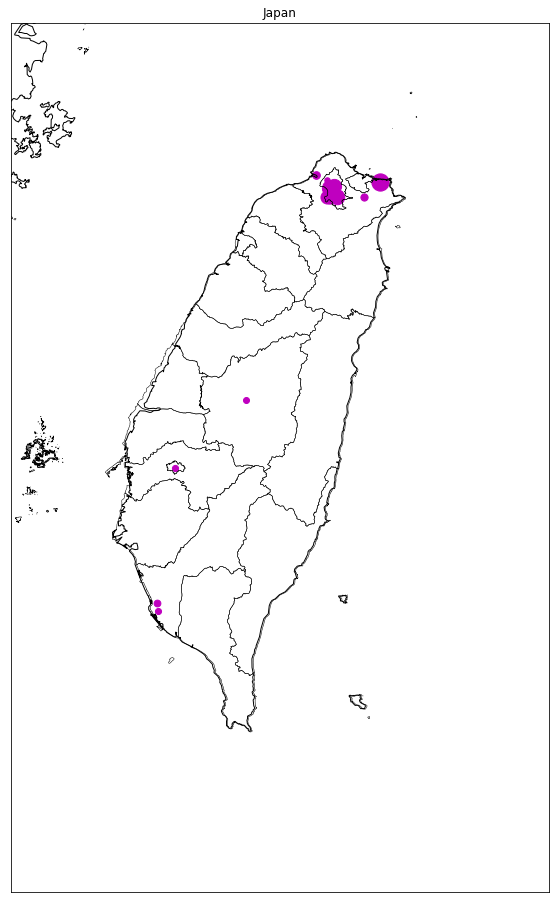

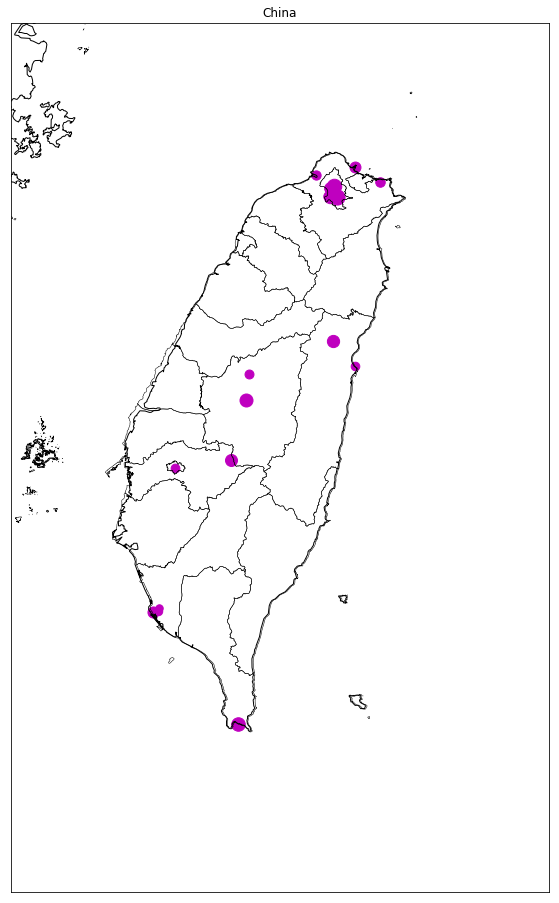

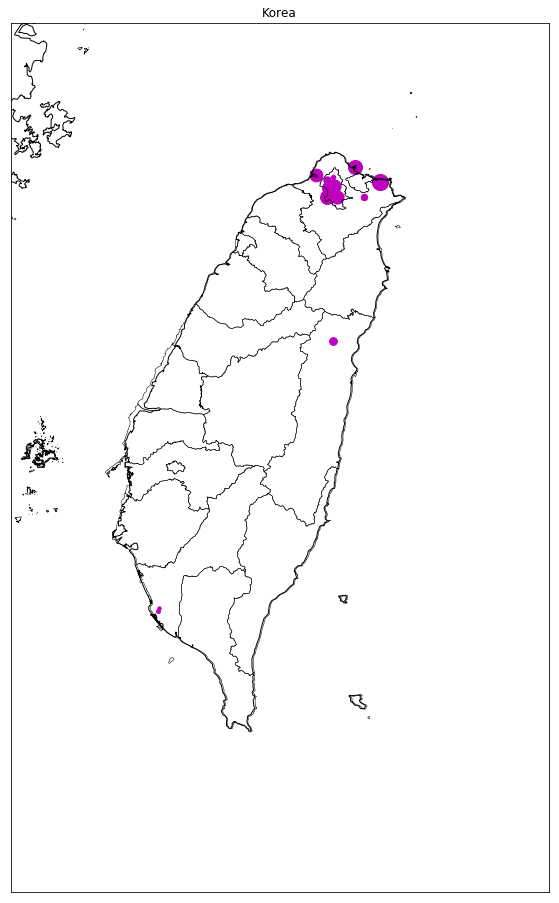

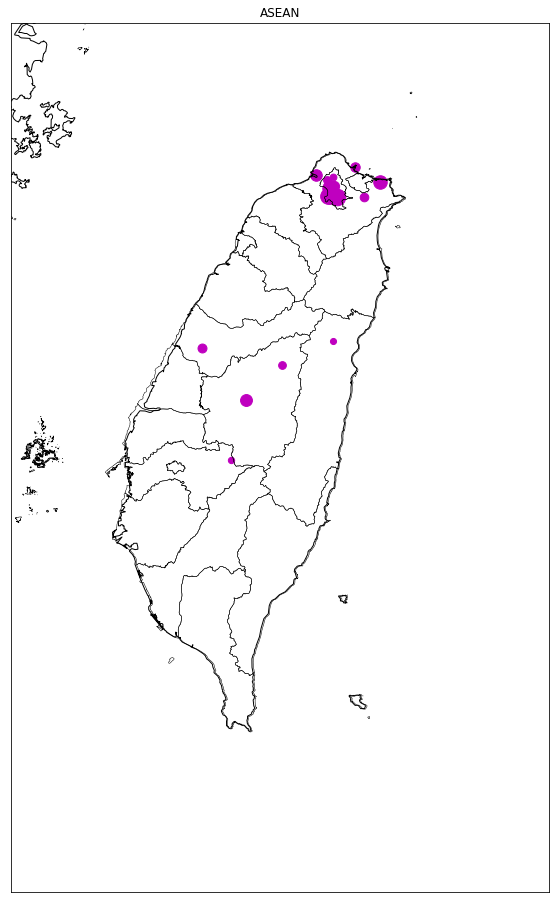

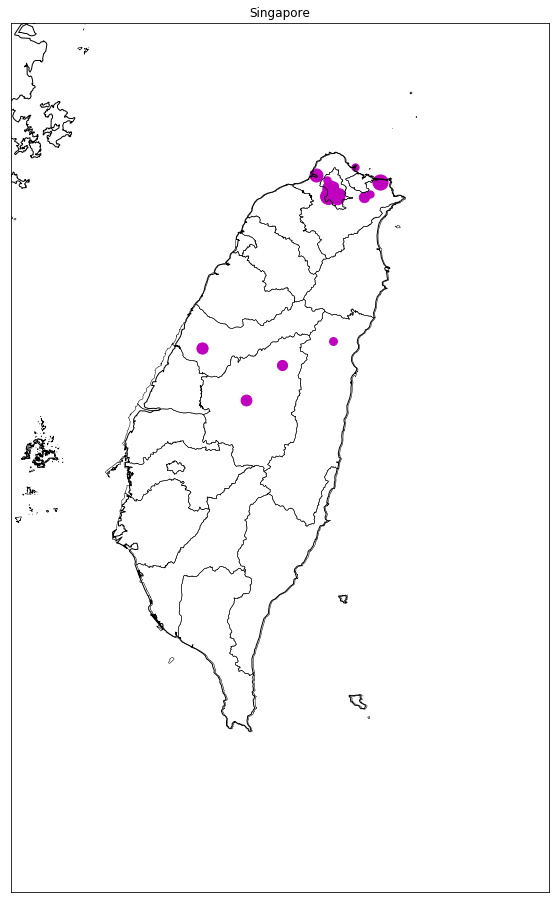

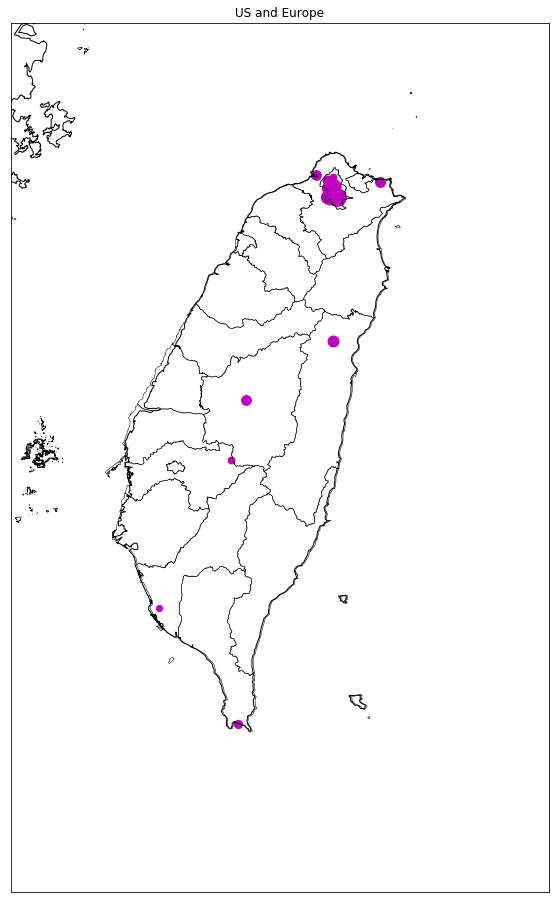

In [152]:
draw_map(jp_spot2,'Japan')
draw_map(ch_spot2,'China')
draw_map(ko_spot2,'Korea')
draw_map(as_spot2,'ASEAN')
draw_map(si_spot2,'Singapore')
draw_map(eu_spot2,'US and Europe')

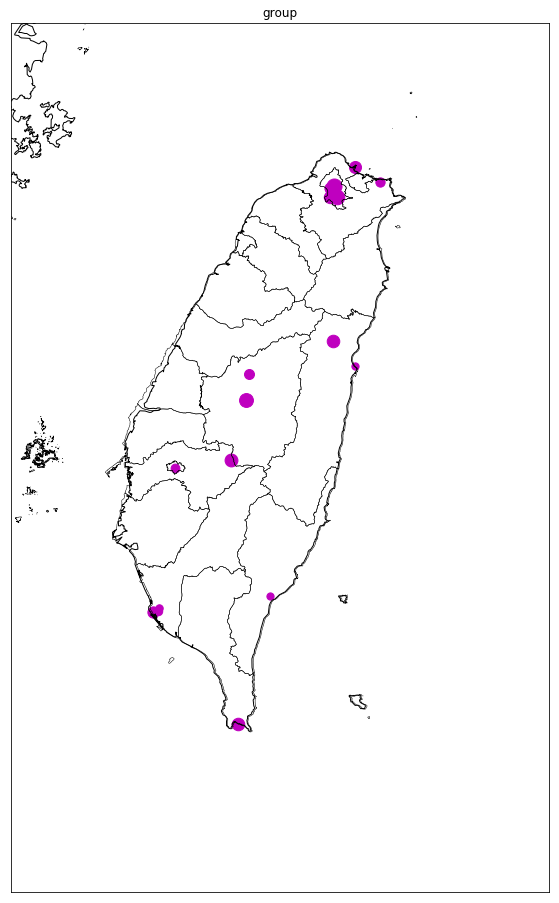

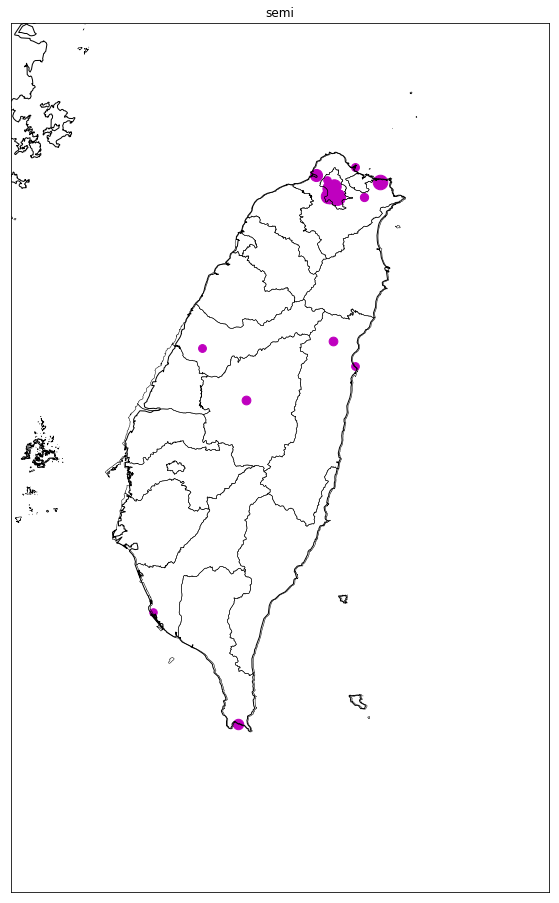

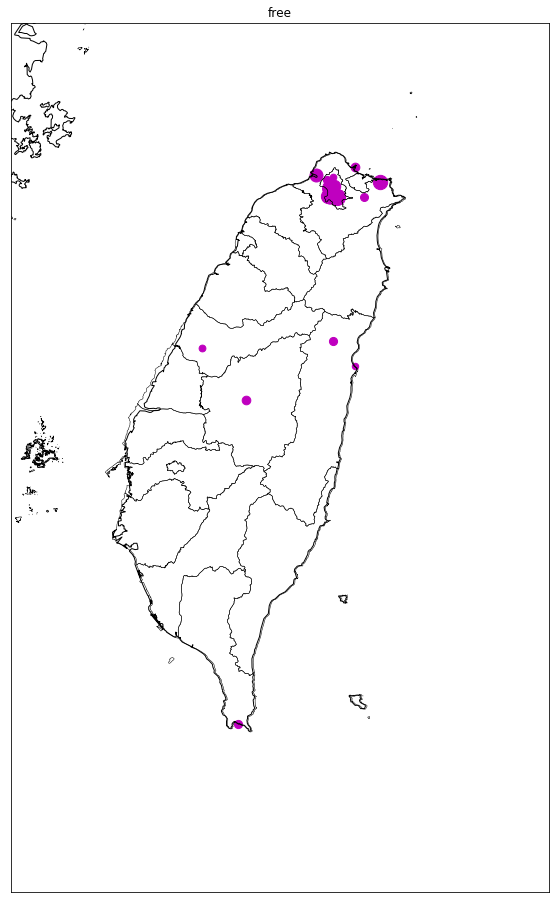

In [153]:
draw_map(type01_spot2,'group')
draw_map(type02_spot2,'semi')
draw_map(type03_spot2,'free')

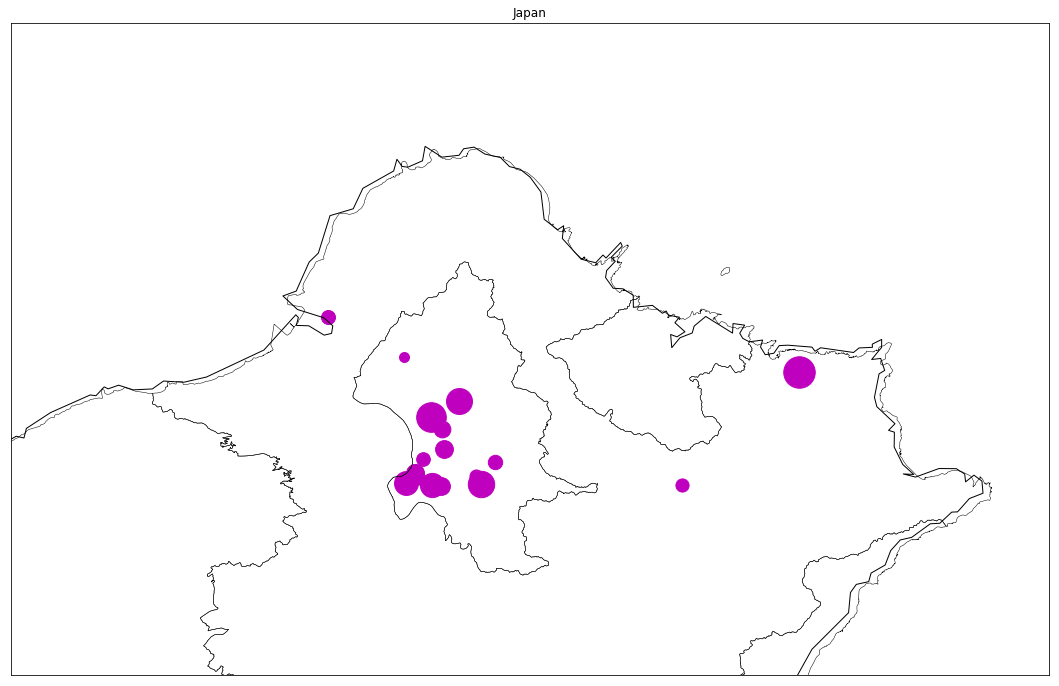

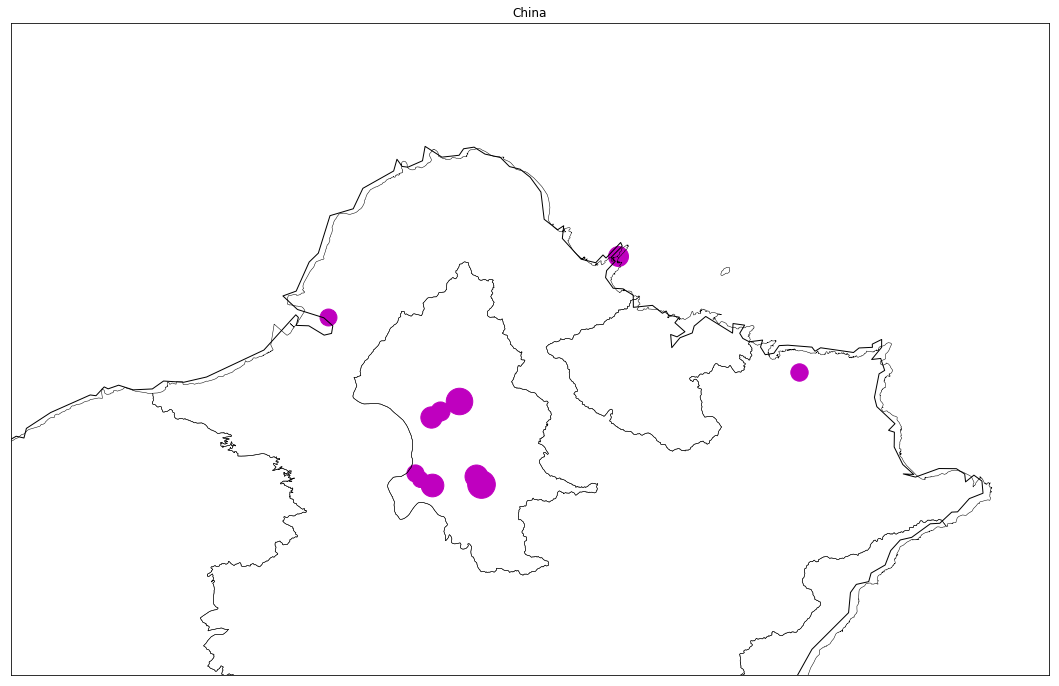

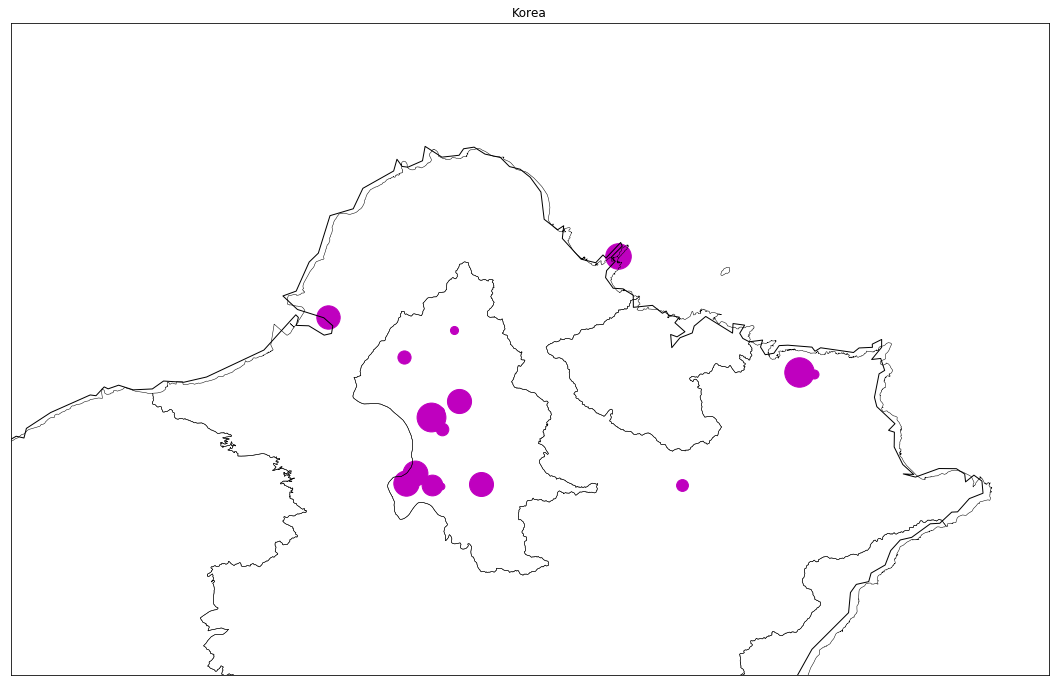

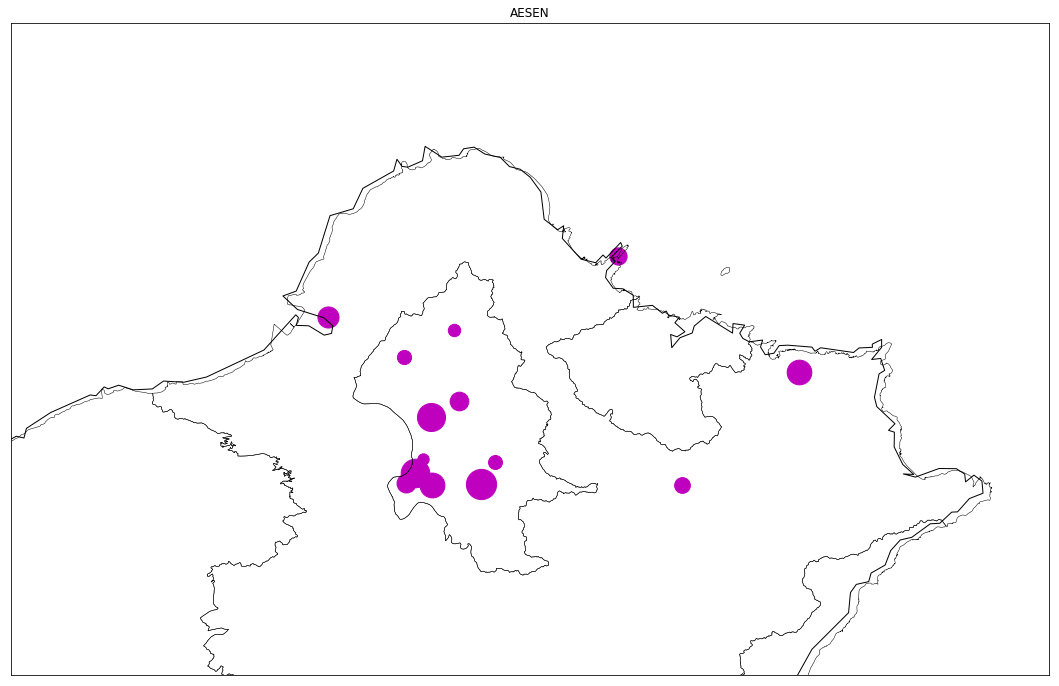

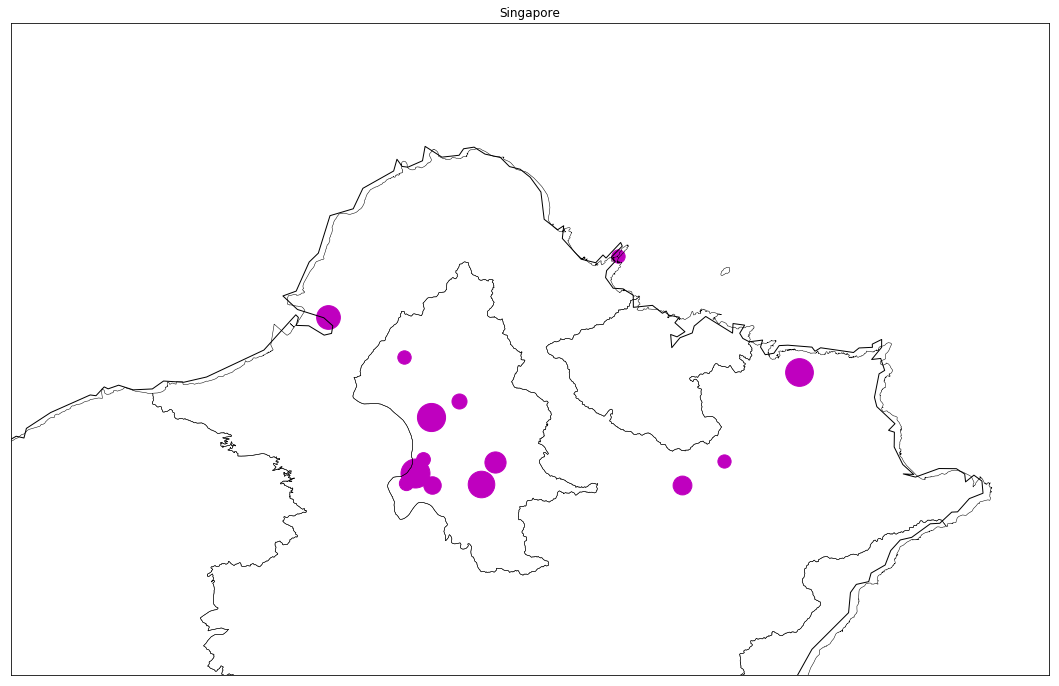

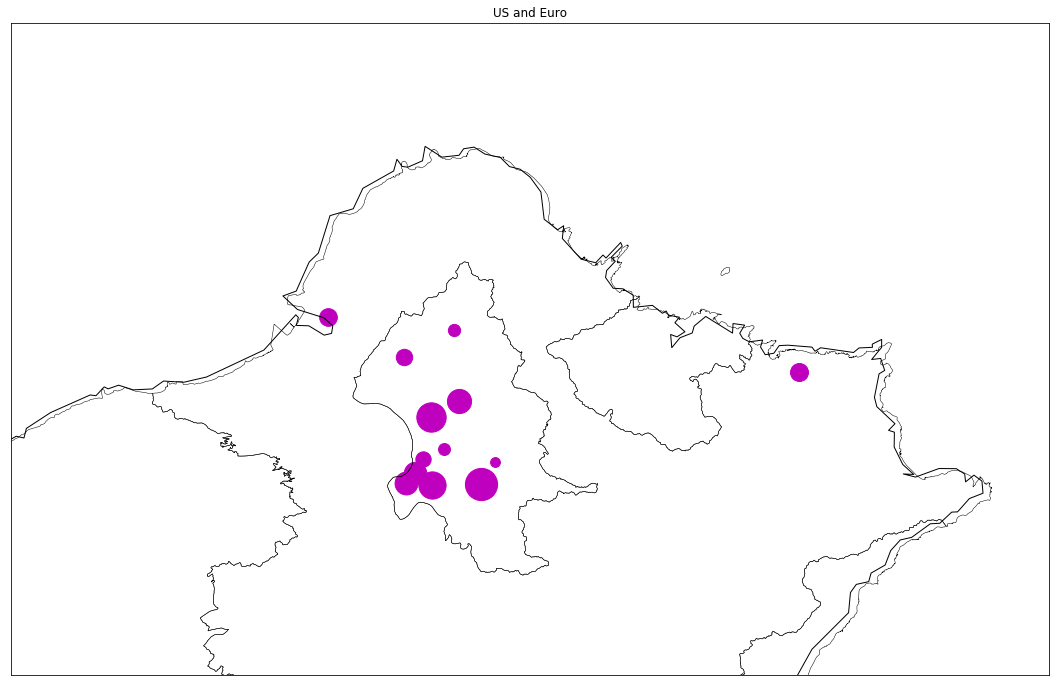

In [154]:
draw_map_newTaipei(jp_spot2,'Japan')
draw_map_newTaipei(ch_spot2,'China')
draw_map_newTaipei(ko_spot2,'Korea')
draw_map_newTaipei(as_spot2,'AESEN')
draw_map_newTaipei(si_spot2,'Singapore')
draw_map_newTaipei(eu_spot2,'US and Euro')

In [112]:
#計算各國團客比例
jp_type1=jp_data[jp_data['type']==1]
ko_type1=ko_data[ko_data['type']==1]
ch_type1=ch_data[ch_data['type']==1]
as_type1=as_data[as_data['type']==1]
eu_type1=eu_data[eu_data['type']==1]
si_type1=si_data[si_data['type']==1]

jp_type0=jp_data[jp_data['type']!=1]
ko_type0=ko_data[ko_data['type']!=1]
ch_type0=ch_data[ch_data['type']!=1]
as_type0=as_data[as_data['type']!=1]
eu_type0=eu_data[eu_data['type']!=1]
si_type0=si_data[si_data['type']!=1]

print('jp',len(jp_type1['id'])/len(jp_data['id']))
print('ch',len(ch_type1['id'])/len(ch_data['id']))
print('ko',len(ko_type1['id'])/len(ko_data['id']))
print('as',len(as_type1['id'])/len(as_data['id']))
print('si',len(si_type1['id'])/len(si_data['id']))
print('US_EU',len(eu_type1['id'])/len(eu_data['id']))

jp 0.42953472690492245
ch 0.47783947501261986
ko 0.243734335839599
as 0.19133807369101485
si 0.1084070796460177
US_EU 0.07504363001745201


In [59]:
print(np.mean(jp_type1['t_money']),' ',np.std(jp_type1['t_money']))
print(np.mean(ko_type1['t_money']),' ',np.std(ko_type1['t_money']))
print(np.mean(ch_type1['t_money']),' ',np.std(ch_type1['t_money']))
print(np.mean(as_type1['t_money']),' ',np.std(as_type1['t_money']))
print(np.mean(eu_type1['t_money']),' ',np.std(eu_type1['t_money']))
print(np.mean(si_type1['t_money']),' ',np.std(si_type1['t_money']))

34371.964195675835   22813.05382719693
34754.03270375141   18999.302799537738
67752.72614409371   64719.78957558268
43499.29591305143   44271.5748838864
61134.15052527689   35682.58552265822
73830.31267086738   64140.38788923644


In [60]:
print(np.mean(jp_type0['t_money']),' ',np.std(jp_type0['t_money']))
print(np.mean(ko_type0['t_money']),' ',np.std(ko_type0['t_money']))
print(np.mean(ch_type0['t_money']),' ',np.std(ch_type0['t_money']))
print(np.mean(as_type0['t_money']),' ',np.std(as_type0['t_money']))
print(np.mean(eu_type0['t_money']),' ',np.std(eu_type0['t_money']))
print(np.mean(si_type0['t_money']),' ',np.std(si_type0['t_money']))

29666.85216452101   17906.242561677238
28163.436252532858   31543.780361039757
51748.966305116584   48034.76144099891
38488.7138103082   65750.98793882696
35971.15550069242   35247.690860514886
60169.43485521625   48962.032120213014


In [62]:
print(np.mean(jp_type1['avg_money']),' ',np.std(jp_type1['avg_money']))
print(np.mean(ko_type1['avg_money']),' ',np.std(ko_type1['avg_money']))
print(np.mean(ch_type1['avg_money']),' ',np.std(ch_type1['avg_money']))
print(np.mean(as_type1['avg_money']),' ',np.std(as_type1['avg_money']))
print(np.mean(eu_type1['avg_money']),' ',np.std(eu_type1['avg_money']))
print(np.mean(si_type1['avg_money']),' ',np.std(si_type1['avg_money']))

12695.895107419105   7031.878572214798
11699.465737456097   6562.675168924271
10395.12288941981   9715.273567497596
9614.936296754784   8738.770794453685
9640.254302331517   4359.390912196579
12753.790129038227   10605.53104116169


In [63]:
print(np.mean(jp_type0['avg_money']),' ',np.std(jp_type0['avg_money']))
print(np.mean(ko_type0['avg_money']),' ',np.std(ko_type0['avg_money']))
print(np.mean(ch_type0['avg_money']),' ',np.std(ch_type0['avg_money']))
print(np.mean(as_type0['avg_money']),' ',np.std(as_type0['avg_money']))
print(np.mean(eu_type0['avg_money']),' ',np.std(eu_type0['avg_money']))
print(np.mean(si_type0['avg_money']),' ',np.std(si_type0['avg_money']))

11027.3197869767   6362.21660466256
8276.841461947955   8219.560755531294
9487.384633699347   8867.64661320248
7401.4884036075255   9093.888401738199
6874.436689186888   12527.985835566727
10094.20045449851   8190.346388726232


In [98]:
type02_spot2[['name','number']]

,name,number
0,台北101,3318
1,士林夜市,3021
2,九份,2797
3,西門町,2734
4,故宮博物院,2388
5,中正紀念堂,2160
6,淡水(紅毛城、老街、漁人碼頭),1933
7,墾丁國家公園,1438
8,艋舺龍山寺,1276
9,國父紀念館,1126


In [161]:
eu_spot2[['name','number']]

,name,number
0,台北101,786
1,士林夜市,653
2,中正紀念堂,562
3,故宮博物院,442
4,艋舺龍山寺,397
5,西門町,381
6,太魯閣、天祥,301
7,九份,245
8,日月潭,242
9,淡水(紅毛城、老街、漁人碼頭),237
